
# FreeAgent Bank Transaction Classification Model 
This Jupyter Notebook contains all the code and visualisations for my Bank Transaction Classification Model .

---
This notebook is split into 4 sections:
1. Section 1 : Contains general visualisations  about the dataset
2. Section 2 : Contains the 1st half of my model, This is an NLP based prediction model  
3. Section 3 : Contains the 2nd half of my model, This is a machine learning based prediction model
4. Section 4 : Contains the combination of both models and evaluation mertrics
5. TODO: Any extra analysis or improvements I could have made on this dataset

There is a summary of my findings the end of each section

---

In [1]:
# General import statements 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
features_df=pd.read_csv("bank_transaction_features.csv")

In [3]:
features_df.head()

,bank_transaction_id,company_id,bank_transaction_description,bank_transaction_amount,bank_transaction_type
0,0,0,21Jul19 NATIONAL EXPRESS,-9.92,DEB
1,1,0,car rental insurance 5Jul19,-19.29,CSH
2,2,0,4Aug19 SMART PARKING CHELSEA LONDON,-34.34,CSH
3,3,0,WAGAMAMAS ON 5 Aug,-9.36,DEB
4,4,0,SUNDRY kfc CARD PAYMENT,-16.14,DEB


In [4]:
labels_df=pd.read_csv("bank_transaction_labels.csv")

In [5]:
labels_df.head()

,bank_transaction_id,bank_transaction_category
0,0,TRAVEL
1,1,MOTOR_EXPENSES
2,2,MOTOR_EXPENSES
3,3,ACCOMMODATION_AND_MEALS
4,4,ACCOMMODATION_AND_MEALS


In [6]:
# Merging both the dfs into a single df
df = pd.merge(features_df, labels_df, on='bank_transaction_id', how='outer')

## Section 1 - 
## General Data Insights

This section contains some general visualisations about the dataset 

---

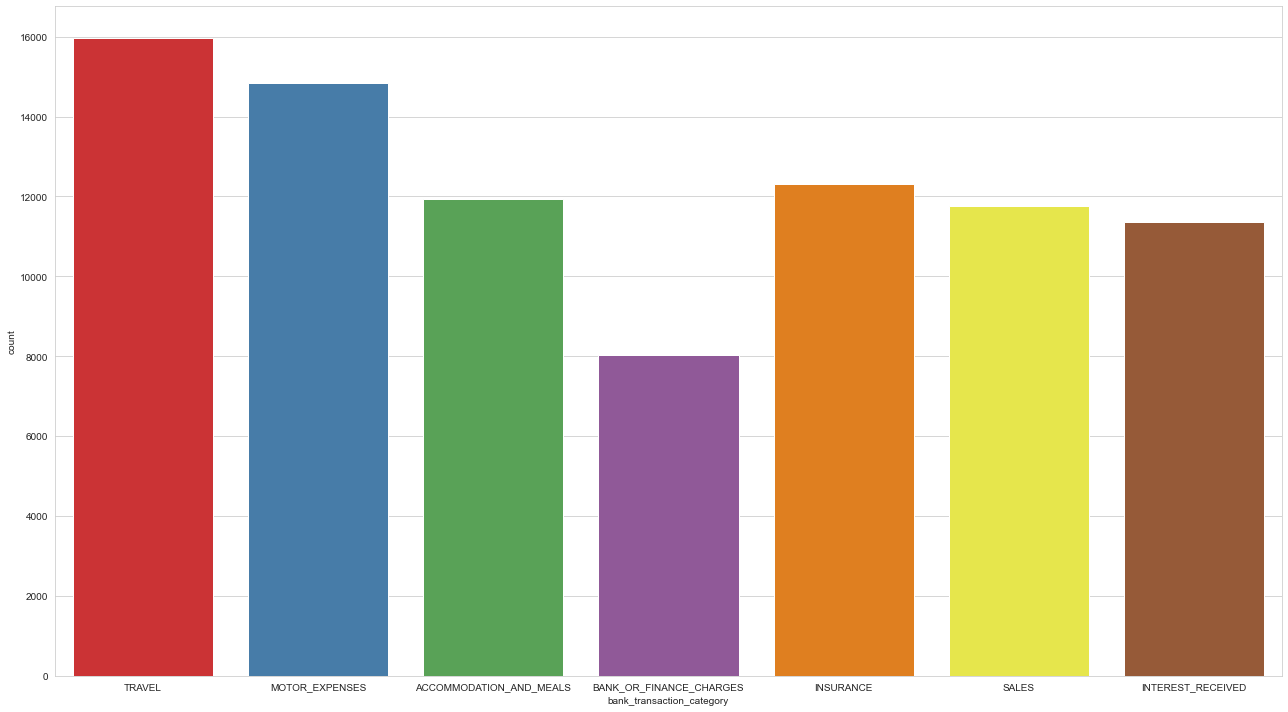

In [8]:
plt.figure(figsize=(18,10))
sns.set_style("whitegrid")
sns.color_palette("Set2")
sns.countplot(x=df['bank_transaction_category'],data=df,palette="Set1")
plt.tight_layout()

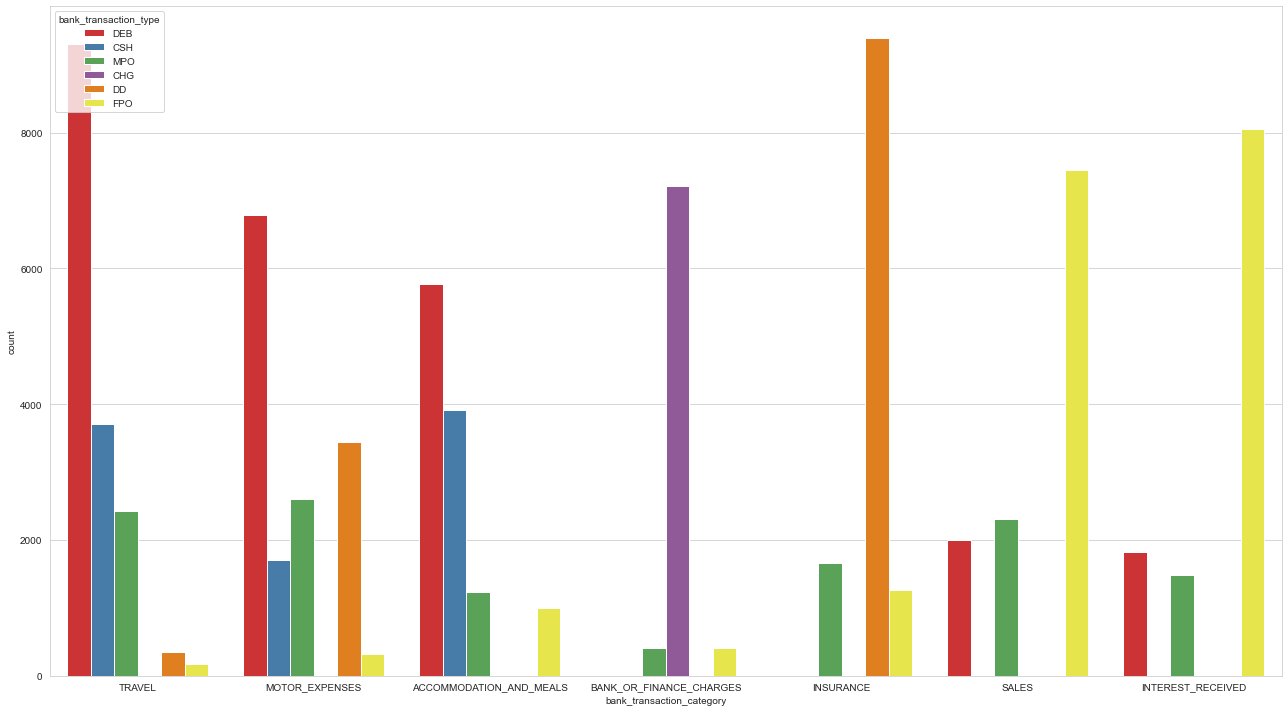

In [9]:
plt.figure(figsize=(18,10))
sns.set_style("whitegrid")
sns.color_palette("Set2")
sns.countplot(x=df['bank_transaction_category'],data=df,palette="Set1",hue=df["bank_transaction_type"])
plt.tight_layout()

In [10]:
df['bank_transaction_category'].value_counts()

TRAVEL                     15960
MOTOR_EXPENSES             14849
INSURANCE                  12318
ACCOMMODATION_AND_MEALS    11938
SALES                      11761
INTEREST_RECEIVED          11354
BANK_OR_FINANCE_CHARGES     8030
Name: bank_transaction_category, dtype: int64

In [11]:
df.head()

,bank_transaction_id,company_id,bank_transaction_description,bank_transaction_amount,bank_transaction_type,bank_transaction_category
0,0,0,21Jul19 NATIONAL EXPRESS,-9.92,DEB,TRAVEL
1,1,0,car rental insurance 5Jul19,-19.29,CSH,MOTOR_EXPENSES
2,2,0,4Aug19 SMART PARKING CHELSEA LONDON,-34.34,CSH,MOTOR_EXPENSES
3,3,0,WAGAMAMAS ON 5 Aug,-9.36,DEB,ACCOMMODATION_AND_MEALS
4,4,0,SUNDRY kfc CARD PAYMENT,-16.14,DEB,ACCOMMODATION_AND_MEALS
5,5,0,Sundry: CONTACTLESS BOOKING.COM,-18.02,DEB,TRAVEL
6,6,0,Apple Pay,-4.37,MPO,BANK_OR_FINANCE_CHARGES
7,7,0,Sundry: hsbc,-4.29,CHG,BANK_OR_FINANCE_CHARGES
8,8,0,dixons coverplan ON 2019-8-18,-18.16,DD,INSURANCE
9,9,0,Fin: hiscox insurance 1Aug19 Direct Debit,-23.28,DD,INSURANCE


In [12]:
df.shape

(86210, 6)

In [441]:
# Creating a copy to not accidently overwrite the original df
df1=df.copy()

---
# Section 2 - 

# The Natural Language Processing Model

In this section we try to predict the bank_transaction_category from the bank_transaction_description
using NLP techniques.

---

The steps for the prediction are 
1. Get a set of unique words for each bank_transaction_category.  
2. Process/Clean the bank_transaction_description
3. Compare the cleaned text with the unique words set 
4. Assign a score for each word 
5. Predict the label based of highest score


In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import spacy

In [15]:
#fucntion to get a set of my unique words
def getUniqueWords(transactionCat):
    dfSubset=df1[df1['bank_transaction_category']==transactionCat]['bank_transaction_description']
    initialString=dfSubset.str.cat(sep=' ')
    initialString=initialString.strip().lower()
    initialString
 
    nlp = spacy.load('en_core_web_sm')
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(initialString)# We tokenize the initialString
    
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
    
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)#We remove the stopwords

    filteredString=' '.join(filtered_sentence)
    filteredString1 = re.sub('(jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)\s\d{2}\s\d{4}', ' ', filteredString)
    processedString = re.sub(r'[0-9]+', '', filteredString1)
    #print(processedString)

    lst=[]
    doc = nlp(processedString)
    for chunk in doc.noun_chunks: # only adding nouns into the unique word set. (Nouns give us better context) 
        txt=chunk.text
        lst.append(txt)
            #print(wp)
        
    final=' '.join(lst)
    final1=word_tokenize(final)
    unique_words = set(final1)
   
    return unique_words

    

In [16]:
# Generating the unique set for each prediction label 
travel_set= getUniqueWords("TRAVEL")
motor_expenses_set= getUniqueWords("MOTOR_EXPENSES")
insurance_set= getUniqueWords("INSURANCE")
acc_meals_set= getUniqueWords("ACCOMMODATION_AND_MEALS")
interest_recieved_set= getUniqueWords("INTEREST_RECEIVED")
bank_set= getUniqueWords("BANK_OR_FINANCE_CHARGES")
sales_set=getUniqueWords("SALES")

In [17]:
#Sanity check - Checking the len of each set of words
print(len(travel_set))
print(len(motor_expenses_set))
print(len(insurance_set))
print(len(acc_meals_set))
print(len(interest_recieved_set))
print(len(bank_set))
print(len(sales_set))

139
89
60
123
35
31
61


In [50]:
checklist=[travel_set,motor_expenses_set,insurance_set,acc_meals_set,sales_set,interest_recieved_set,bank_set]
labels_list=['TRAVEL','MOTOR_EXPENSES','INSURANCE','ACCOMMODATION_AND_MEALS','SALES',
             'INTEREST_RECEIVED','BANK_OR_FINANCE_CHARGES']


In [19]:
#function to predcit label based on the cleaned bank transaction description
def labelPredictor(testToken):
    count=np.zeros(len(checklist))

    for i in range(len(checklist)):

        for j in testToken:
        
            if j in checklist[i]:

                count[i]+=1
            
    count_1=count/sum(count)

    index = np.argwhere(count_1 == np.amax(count_1))

    return [labels_list[x] for x in index.flatten().tolist()]

In [541]:
# Sanity check - checking if my model can predict labels
labelPredictor(word_tokenize('car rental insurance'))

['MOTOR_EXPENSES']

In [22]:
#fucntion for cleaning text in the bank description 
def clean_text(text):
    text=text.lower()
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)# We tokenize the initialString
    
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
    
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)#We remove the stopwords

    filteredString=' '.join(filtered_sentence)
    processedString = re.sub(r'[0-9]+', '', filteredString)# removing numbers
    
    dates={'jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec',}# removing months
    resultwords  = [word for word in re.split("\W+",processedString) if word and word.lower() not in dates]
    final_text=" ".join(str(x) for x in resultwords)
    return final_text
    
    
    

In [23]:
# Sanity Check - 
clean_text('dixons coverplan ON 2019-8-18')

'dixons coverplan'

In [443]:
df1['test']=df['bank_transaction_description'].apply(str)

In [444]:
#cleaning the bank transaction description text 
df1['cleaned_description']=df1["test"].apply(clean_text)

In [445]:
#tokenizing and applying my mabel predictor model
tokenize=df1['cleaned_description'].apply(word_tokenize)
df1["preds"]=tokenize.apply(labelPredictor)

---
# Section 3 - 

# The Machine Learning Model

In this section we try to predict the labels based on multinomial logistic regression.


---

In [461]:
#logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
le = preprocessing.LabelEncoder()

In [494]:
#function to predcit label based on the cleaned bank transaction description

def labelPredictor1(testToken):
    count=np.zeros(len(checklist))

    for i in range(len(checklist)):

        for j in testToken:
        
            if j in checklist[i]:

                count[i]+=1
            
    count_1=np.round(count/sum(count),3)

    

    return count_1


def create_labels_cols(test):
    for i in labels_list:
        test[i]=0


In [502]:
df3=df1[["bank_transaction_type","bank_transaction_category","cleaned_description"]].copy()
create_labels_cols(df3)
df3["score"]=tokenize.apply(labelPredictor1)
df3["preds"]=tokenize.apply(labelPredictor)
score=df3['score']
df3["TRAVEL"]=score.apply(lambda x:x[0])
df3["MOTOR_EXPENSES"]=score.apply(lambda x:x[1])
df3["INSURANCE"]=score.apply(lambda x:x[2])
df3["ACCOMMODATION_AND_MEALS"]=score.apply(lambda x:x[3])
df3["SALES"]=score.apply(lambda x:x[4])
df3["INTEREST_RECEIVED"]=score.apply(lambda x:x[5])
df3["BANK_OR_FINANCE_CHARGES"]=score.apply(lambda x:x[6])
df3['preds']

df3["preds"]=df3['preds'].apply(lambda x :x if len(x)>0 else np.nan)
df3.dropna(inplace=True)

In [503]:

final=pd.DataFrame()
final["label"]=(df3['bank_transaction_category'])
final["nlp"]=(df3['preds'])

In [504]:
df3.drop(['score'],axis=1,inplace=True)
df3.drop(['cleaned_description'],axis=1,inplace=True)
df3.drop(['preds'],axis=1,inplace=True)
df3['bank_transaction_type'] = le.fit_transform(df3['bank_transaction_type'])
df3['bank_transaction_category']=le.fit_transform(df3['bank_transaction_category'])
df3.dropna(inplace=True)
#X = np.array(df2['bank_transaction_type'])
Y = df3['bank_transaction_category']
df3.drop(["bank_transaction_category"],axis=1,inplace=True)

df3.head()


,bank_transaction_type,TRAVEL,MOTOR_EXPENSES,INSURANCE,ACCOMMODATION_AND_MEALS,SALES,INTEREST_RECEIVED,BANK_OR_FINANCE_CHARGES
0,3,1.000,0.000,0.000,0.0,0.00,0.00,0.0
1,1,0.286,0.429,0.286,0.0,0.00,0.00,0.0
2,1,0.400,0.400,0.100,0.1,0.00,0.00,0.0
3,3,0.000,0.000,0.000,1.0,0.00,0.00,0.0
4,3,0.150,0.150,0.100,0.2,0.15,0.15,0.1


In [505]:
#X=X.reshape(-1,1)
#df3=df3["bank_transaction_type"]
#df3=np.array(df3).reshape(-1,1)
#X_train, X_test, y_train, y_test = train_test_split(df3[0:5000], Y[0:5000], test_size=0.33, random_state=42)
X_train=df3
X_test=df3
y_train=Y
y_test=Y


In [533]:
df3.shape

(85122, 8)

In [534]:
final["model"]=list(le.inverse_transform(preds))

---
# Section 4 - 

# Merging the 2 models into a final model

In this section we merge both the nlp and machine learning model to get our final prediction ( final_pred )


---

In [535]:
final["len"]=final["nlp"].apply(lambda x:len(x))
final["merge_pred"]=final["nlp"].apply(lambda x:x if len(x)<3 else "")
final[final["merge_pred"]==0]["merge_pred"]=1
final["merge_pred"].where(final.merge_pred!="",final["model"], inplace=True)
final["final_pred"]=final["merge_pred"].apply(lambda x:x[1] if len(x)==2 else (x[0] if len(x)==1 else x))
final

,label,nlp,model,len,merge_pred,final_pred
0,TRAVEL,[TRAVEL],TRAVEL,1,[TRAVEL],TRAVEL
1,MOTOR_EXPENSES,[MOTOR_EXPENSES],MOTOR_EXPENSES,1,[MOTOR_EXPENSES],MOTOR_EXPENSES
2,MOTOR_EXPENSES,"[TRAVEL, MOTOR_EXPENSES]",MOTOR_EXPENSES,2,"[TRAVEL, MOTOR_EXPENSES]",MOTOR_EXPENSES
3,ACCOMMODATION_AND_MEALS,[ACCOMMODATION_AND_MEALS],ACCOMMODATION_AND_MEALS,1,[ACCOMMODATION_AND_MEALS],ACCOMMODATION_AND_MEALS
4,ACCOMMODATION_AND_MEALS,[ACCOMMODATION_AND_MEALS],ACCOMMODATION_AND_MEALS,1,[ACCOMMODATION_AND_MEALS],ACCOMMODATION_AND_MEALS
...,...,...,...,...,...,...
86205,INTEREST_RECEIVED,[INTEREST_RECEIVED],INTEREST_RECEIVED,1,[INTEREST_RECEIVED],INTEREST_RECEIVED
86206,INTEREST_RECEIVED,[SALES],SALES,1,[SALES],SALES
86207,INTEREST_RECEIVED,[INTEREST_RECEIVED],INTEREST_RECEIVED,1,[INTEREST_RECEIVED],INTEREST_RECEIVED
86208,SALES,"[MOTOR_EXPENSES, SALES, INTEREST_RECEIVED]",MOTOR_EXPENSES,3,MOTOR_EXPENSES,MOTOR_EXPENSES


---
# Section 5 - 

# Evaluating the Model

In this section we evaluate the model using a confusion matrix. We also the the precission , recall, f1-score for our multi-class classification model


---

In [536]:
label = le.fit_transform(final['label'])
final_pred = le.fit_transform(final['final_pred'])
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(label, final_pred))

0.7479969925518667


In [537]:
from sklearn.metrics import classification_report
print(classification_report(label, final_pred, target_names=list(le.classes_)))


                         precision    recall  f1-score   support

ACCOMMODATION_AND_MEALS       0.69      0.86      0.77     11622
BANK_OR_FINANCE_CHARGES       0.91      0.97      0.94      7692
              INSURANCE       0.75      0.96      0.84     12189
      INTEREST_RECEIVED       0.78      0.82      0.80     11354
         MOTOR_EXPENSES       0.65      0.69      0.67     14849
                  SALES       0.77      0.74      0.76     11761
                 TRAVEL       0.81      0.40      0.53     15655

               accuracy                           0.75     85122
              macro avg       0.76      0.78      0.76     85122
           weighted avg       0.76      0.75      0.74     85122

